# 03 - Linear Regression




친숙하게 알고 있는 Sin 그래프를 이용해서 <br>
Linear Regression 을 Scikit Learn Library 를 이용해 수행해보자

### Import Library

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

### Prepare simple dataset

In [ ]:
print(np.pi)

3.141592653589793


In [ ]:
# true data
N = 100   # 데이터 개수

# linspace = 선형 구간 혹은 로그 구간을 지정한 구간의 수만큼 분할한다.    # linspace(시작, 끝(포함), 갯수) 
# 시작, 끝(포함), 갯수
# reshape = 기존 데이터는 유지하고 차원과 형상을 바꿈.
# ex) 3개의 행과 4개의 열로 구성된 배열로 재설정하고 싶으면 reshape(3, 4)
# reshape(N,1) = N개 행, 1개 열

# x 값은 0/~2*pi 이고
# y 값은 -1~1 사이의 값
X = np.linspace(0, 2*np.pi, N)  # np.linspace : 구간 내 숫자 채우기(0부터 2*pi 사이를 N개로 채우기)
X

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

In [ ]:
X.shape

(100,)

In [ ]:
# reshape = 기존 데이터는 유지하고 차원과 형상을 바꿈.

X.reshape(-1, 1).shape  # x를 100개 해주기 위해 -1을 해줌
# X.reshape(N, 1).shape -> 위 코드와 같음

(100, 1)

In [ ]:
# 최종 "X"
X = np.linspace(0, 2*np.pi, N).reshape(-1, 1)
X[:5]

array([[0.        ],
       [0.06346652],
       [0.12693304],
       [0.19039955],
       [0.25386607]])

In [ ]:
# sin함수 만들기
np.sin(2*np.pi)

-2.4492935982947064e-16

In [ ]:
np.sin(X)[:5]

array([[0.        ],
       [0.06342392],
       [0.12659245],
       [0.18925124],
       [0.25114799]])

In [ ]:
np.sin(X).shape

(100, 1)

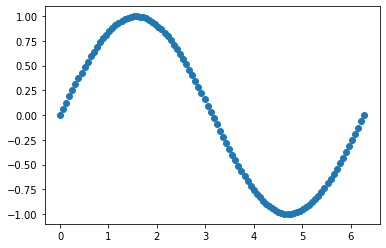

In [ ]:
# plot 그리기

y = np.sin(X)   # y에 sin함수 저장
# plt.plot(X, y)
plt.scatter(X,y)
plt.show()

#### Noise 만들어주기
- rand (0과 1사이의 난수를 발생시키는) 명령어를 사용

**노이즈 섞는 이유**    
-> 실제 데이터를 만드는 것   
-> 랜덤하게 노이즈 값을 만들어서 실제 데이터에 집어 넣어서 실제 데이터를 만든 것

In [ ]:
# --------------------------------
a = np.random.rand(N, 1)
# 100개가 맞는지 확인해보자
len(a)

100

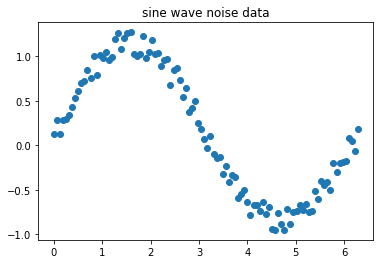

In [ ]:
np.random.seed(1)
y += 0.3*np.random.rand(N, 1)   # np.random.rand(N, 1) : 100개를 랜덤화 / 거기에 0.3을 각각 곱해줌

plt.scatter(X, y)
plt.title('sine wave noise data')
plt.show()

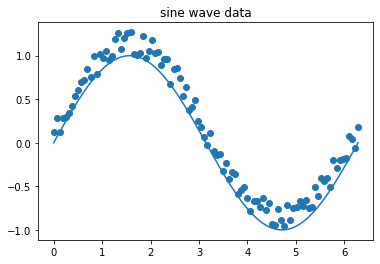

In [ ]:
# 실제 데이터랑 비교해보자(실제 데이터는 예쁘게 나오는데 노이즈 낀 것은 안 예쁘게 출력)
# 기존 그래프와 함께 plotting

y = np.sin(X)
plt.plot(X, y)

# add noise
np.random.seed(1)
y += 0.3*np.random.rand(N, 1)

plt.scatter(X, y)
plt.title('sine wave data')
plt.show()

#### Shuffle Dataset

In [ ]:
# shuffle data
np.random.seed(10)  # seed 설정 난수 고정

# N은 100이므로 1~100까지의 수를 섞어준다 / N까지 무작위로 섞인 배열 / permutation : 순열(배열..?)
idx = np.random.permutation(N)    #  np.random.permutation -> N까지의 무작위로 섞인 숫자 출력
print(idx)


# 섞어놓고 train, test로 나눌 것이다. 

[19 14 43 37 66  3 79 41 38 68  2  1 60 53 95 74 92 26 59 46 90 70 50 44
 76 55 21 61  6 63 42 34 84 52 35 39 45  4  5 48 32 20 83 58 47 80 17 67
 81  7 87 97 98 99 24 10 96 86 56 71 23 22 91 94 18 27 88 57 31 65 12 82
 30 75 25 13 69 77 85 51 49 78 72 33 62 54 11 16 36 40  0 73  8 29 93 89
 28 64 15  9]


In [ ]:
# import numpy as np
# a = [5,2,3,1,0,4,7,6,9,8]
# np.arange(10)

In [ ]:
# np.arange(10)[a]

In [ ]:
# X와 y를 똑같이 섞어줘야 한다. 
shuffle_X = X[idx]  # 섞을 것이 앞에 있어야 한다('X')  / idx는 [19, 14, 43..]이렇게 구성되어 있음. 따라서 X의 19번째 인덱스, 14번째 인덱스...이렇게 출력될 것이다.  
shuffle_y = y[idx]

print(shuffle_X[:3])  # 인덱스 2번까지 출력해보자.
print(shuffle_y[:3])

[[1.20586385]
 [0.88853126]
 [2.72906028]]
[[0.99357831]
 [0.78436274]
 [0.63771433]]


In [ ]:
# X[idx]

### Split train & test (3:1 의 비율)

In [ ]:
# 3:1 의 비율로 train test 를 나눔
n = int(N * (3/4))

# train data
X_train = shuffle_X[:n]  # 3/4 지점까지 슬라이싱
y_train = shuffle_y[:n]

In [ ]:
# print(int(N * (3/4)))
# print(len(shuffle_X[:n]))

In [ ]:
# test data
X_test = shuffle_X[n:]  # 1/4   # 3/4 지점부터 끝까지
y_test = shuffle_y[n:]

In [ ]:
# len(shuffle_X[n:])

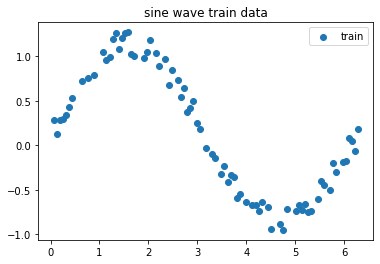

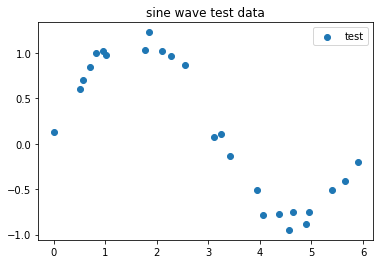

In [ ]:
# plot
plt.scatter(X_train, y_train, label='train')
plt.legend()
plt.title('sine wave train data')
plt.show()

plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.title('sine wave test data')
plt.show()

### Perform Linear Regression
- compute W using sklearn library   

https://teddylee777.github.io/scikit-learn/gradient-descent


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)    # fit : 모델에서 학습시키는 함수

# gradient descent(경사 하강법) 알고리즘을 이용해서 최적값을 찾아냄

LinearRegression()

In [ ]:
# 최적값 출력
print('w0: ', reg.intercept_)  # b값(절편)
print('w1: ', reg.coef_)   # 기울기

w0:  [1.02083628]
w1:  [[-0.27359283]]


In [ ]:
# y = w1X + w0

### X data 을 이용해서 Prediction 을 하기 위해서는 .predict 를 이용

In [ ]:
Pred = reg.predict(X_train)

Figure : matplotlib은 한 번에 한장의 그림을 그린다. 이 그림을 가리키는 용어가 figure이다. figure는 그림을 그리는 캔버스로 생각할 수 있으며, 하나의 figure에는 여러 개의 plot이 들어갈 수 있다. 

차이를 제곱해서 더한 후 평균을 낸 것이 성능!!(MSE)   
test 성능이 좋은 것을 써야함!! -> 새로운 데이터를 예측해야 하기 때문에

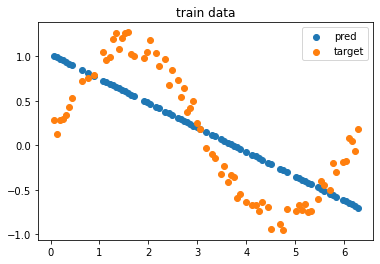

In [ ]:
plt.figure()
plt.scatter(X_train, Pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

# 파란선이 예측인데 예측을 잘 못하고 있음 -> 일차방정식을 사용했기 때문에!!(최소한 2차방정식이면 잘 나올 것이다.)

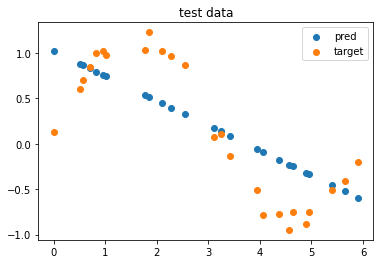

In [ ]:
plt.figure()
plt.scatter(X_test, reg.predict(X_test), label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

## Practice
 - Another Dataset
 - 임의의 function 을 지정한 후 linear regression 을 수행
 
$ y = 2x + 5 $

 *****참고*** **  
위의 문제에서는 y가 sin(X)인 문제를 푼 것이다.   
문제가 선형으로 바뀐 것이다.   
y를 2x + 5일 때로 바꾸면 위의 문제랑 똑같이 풀 수 있다.   
위에서의 선형 회귀함수를 그대로 가지고 와서 fit 시키면 똑같이 뽑을 수 있다.    
   
입력 X는 똑같다.

In [ ]:
X = 3 * np.random.rand(100,1) # shape => (100, 1)
y = 2*X + 5

# add_noise
y_noise = y + np.random.rand(100, 1) # noise data 를 가진 y 값

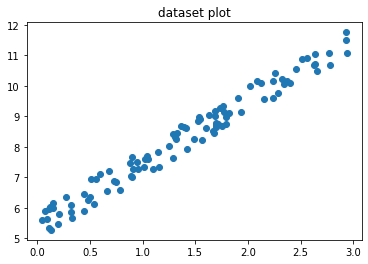

In [ ]:
plt.scatter(X, y_noise)
plt.title('dataset plot')
plt.show()

#### 아까와 같은 방식으로 풀어보자

In [ ]:
# 노이즈 낀것을 가지고 fit을 시켜보자
reg = LinearRegression()
reg.fit(X, y_noise)

print('w0: ', reg.intercept_)  # b값(절편)
print('w1: ', reg.coef_)   # 기울기

w0:  [5.46443632]
w1:  [[2.027286]]


$ {y = 2.027286x + 5.46443632} $

$ {y = 2x + 5} $

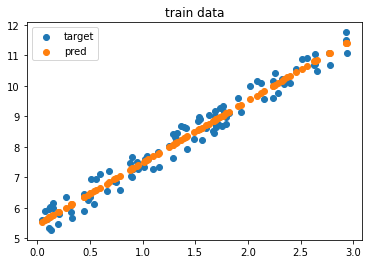

In [ ]:
plt.figure()
plt.scatter(X, y_noise, label='target')
plt.scatter(X, reg.predict(X), label='pred')
plt.legend()
plt.title('train data')
plt.show()

***

## Polynomial Regression (다항회귀)

#### Anonther Dataset

$ y = x^2 + 3x + 5 $

In [ ]:
np.random.seed(5)

N = 100
# 기존 x 범위는 0~6 사이였으나 -3 이 있으므로 -3~3 이 범위로 바뀌게 된다.
X = 6 * np.random.rand(N,1)-3 
y = X**2 + 3*X +5

noise 추가

In [ ]:
y_noise = y + 3*np.random.rand(N, 1)

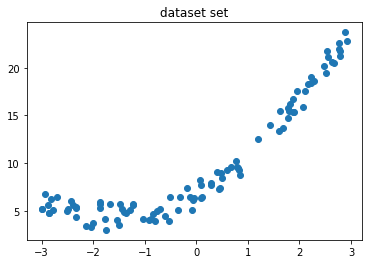

In [ ]:
plt.scatter(X, y_noise)
plt.title('dataset set')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y_noise)

print('w0: ', reg.intercept_)  # b절편
print('w1: ', reg.coef_)   # 기울기

w0:  [9.86809285]
w1:  [[2.97610592]]


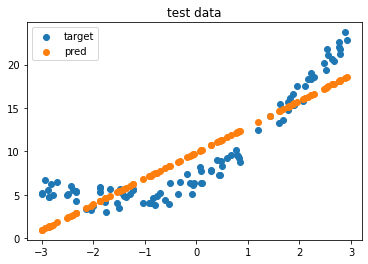

In [ ]:
plt.figure()   #  matplotlib에서 figure를 만들고 편집할 수 있게 만들어주는 함수
plt.scatter(X, y_noise, label='target')
plt.scatter(X, reg.predict(X), label='pred')

plt.legend()
plt.title('test data')
plt.show()

 - 위의 예시에서 보듯, Sin Function 그래프를 1차원 직선으로 나타내기엔 무리가 있음
 - X 의 feature 를 더 추가해주어서 좀 더 정확한 Linear Regression 을 수행

### 좀 더 자세히 살펴보자

위의 예시에서 풀어왔던 Linear Regression 의 경우

$ y_{1} = w_{1}x_{1} + w_{0} $

(여기서 $w_{1}$ 은 reg.coef_ 이고 $w_{0}$ 은 reg.intercept_ 로 구했음) <br>
와 같은 간단한 직선 방정식의 형태를 가정하고 풀었던 과정이었다.
***
이것은 우리가 가지고 있는 X 의 feature 가 하나 밖에 있지 않았기 때문이다.<br>

하지만 X 의 feature 를 제곱, 세제곱의 형태로 임의로 늘려준다면 방정식은 1차원의 직선이 아닌, 아래와 같이 고차원의 식으로 변할 수 있다.

$ y_{1} = w_{n}x_{1}^n + w_{n-1}x_{1}^{n-1} + ... + w_{2}x_{1}^2 + w_{1}x_{1}^1 + w_{0} $

즉, 기존의 X 를 제곱, 세제곱의 형태를 만들어서 feature 를 추가해준다면, 좀 더 정확한 Model 을 얻게 될 것이다.

****
#### Library 를 이용해서 feature(특징) 를 추가해보자.

Feature 를 추가 할 때는 PolynomialFeatures 를 사용<br>
제곱, 세제곱 등의 계산이 가능   
https://inuplace.tistory.com/515

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

w1*x + w0 에서   
w2*x^2 + w1*x + w0 가 되어야 함   
즉, x의 차원을 늘려야 한다는 뜻.    
- 여기에서 w0 값을 bias라고 부른다. 

$ y = x^2 + 3x + 5 $   
x^2와 x가 필요함.   
이것에 대한 전처리 작업으로 x^2과 x를 만들어 준것이다. -> 이 코드가 바로 dgree = 2 이다.   
degree = 2를 줌으로써 x^2과 x를 만들어 준것.

In [ ]:
# transform from (x1, x2) to (1, x1, x2, x1^2, x1*x2, x2^2)   ## default
# transform from (x1, x2) to (x1, x2, x1^2, x1*x2, x2^2)      ## include_bias = False

# reg.intercept_에서 b절편을 쓸거라서 여기에서 bias를 쓰지 않음(False)
# bias를 포함시키지 않고, x를 2차원으로 바꿔줌(x는 만들어놓은 x이다.) 
polynomial = PolynomialFeatures(degree = 2, include_bias = False)     # degree = 2는 2차원으로 차원을 설정(변경)해주는 코드
new_feature = polynomial.fit_transform(X)  # 새로운 'X' 생성

In [ ]:
# 원래 위에서는 (100, 1) 이었는데 (100, 2)가 됨.!!
new_feature.shape

(100, 2)

In [ ]:
new_feature

array([[-1.66804097e+00,  2.78236069e+00],
       [ 2.22439384e+00,  4.94792794e+00],
       [-1.75968507e+00,  3.09649154e+00],
       [ 2.51166545e+00,  6.30846332e+00],
       [-6.95328672e-02,  4.83481963e-03],
       [ 6.70463177e-01,  4.49520872e-01],
       [ 1.59544714e+00,  2.54545157e+00],
       [ 1.10507927e-01,  1.22120020e-02],
       [-1.21919699e+00,  1.48644130e+00],
       [-1.87367263e+00,  3.51064912e+00],
       [-2.51555239e+00,  6.32800381e+00],
       [ 1.43064178e+00,  2.04673589e+00],
       [-3.52144663e-01,  1.24005863e-01],
       [-2.05014079e+00,  4.20307727e+00],
       [ 2.27962219e+00,  5.19667732e+00],
       [-1.35548123e+00,  1.83732936e+00],
       [-5.14589886e-01,  2.64802750e-01],
       [-1.22352040e+00,  1.49700218e+00],
       [ 7.72727453e-01,  5.97107717e-01],
       [ 4.79026861e-01,  2.29466734e-01],
       [ 5.99575180e-01,  3.59490396e-01],
       [-1.40508529e+00,  1.97426469e+00],
       [-1.29188472e+00,  1.66896612e+00],
       [-1.

In [ ]:
print("기존의 x[0]:",X[0])
print("Feature가 추가된 x[0]:", new_feature[0])  # [X값, X의 제곱 값]

기존의 x[0]: [-1.66804097]
Feature가 추가된 x[0]: [-1.66804097  2.78236069]


In [ ]:
print(-1.66804097*-1.66804097)

2.782360677598541


##### Feature 를 추가한 상태에서 LinearRegression 을 다시 사용

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(new_feature, y_noise)  # 2차원 일때의 선형회귀가 된다. (새로운 X인 new_feature을 넣어줌으로써)
# y = w2 X^2 + w1x + w0  # x의 제곱이랑 x를 가지고 있고, y 빼고 그 둘은 새로 생김
print('w0: ', reg.intercept_)  # 마지막에 더해지는 상수값 출력
print('w1: ', reg.coef_)    # [X일 때, X의 제곱일 때] 값 출력

# 밑에 수식값 숫자가 출력

w0:  [6.82439098]
w1:  [[3.02103818 0.92278965]]


$ {y = x^2 + 3x + 5} $

$ {y = 0.92x^2 + 3.02x + 6.82} $

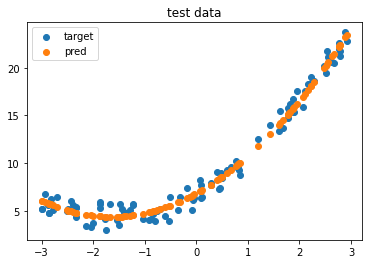

In [ ]:
# 파란색 : 우리가 가지고 있던 train 데이터
# 주황색 : 예측한 데이터
plt.figure()
plt.scatter(X, y_noise, label='target')   # new_feature(새로운 X)가 아닌 X가 들어가야 하는 이유...? # new_feature를 쓰면 X와 X^2의 값이 들어가서 이상한 그래프가 된다.
plt.scatter(X, reg.predict(new_feature), label='pred')

plt.legend()
plt.title('test data')
plt.show()

# Practice1

## Polynomial Regression

x 의 범위는 -2~2 

$ {y = 3x^3 + 2x^2 + 7x + 5} $

In [ ]:
np.random.seed(10)

N = 100
X = 4 * np.random.rand(N,1)-2 # -2~2 로 범위를 만들기 위해 -2 를 끝에 붙임
y = 3*X**3 + 2*X**2 + 7*X + 5

y_noise = y + 10*np.random.rand(N, 1)  # 노이즈 추가

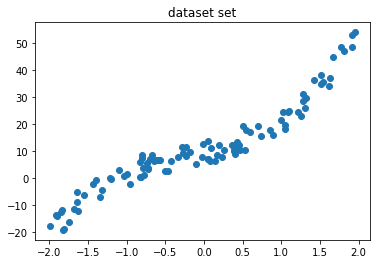

In [ ]:
plt.scatter(X, y_noise)
plt.title('dataset set')
plt.show()

In [ ]:
# degree : 거듭제곱의 차수
# include_bias : 편향값(1) 추가 여부
polynomial = PolynomialFeatures(degree = 3, include_bias = False)     # degree = 3는 3차원으로 차원을 설정(변경)해주는 코드
# 훈련 데이터셋 X 의 거듭제곱을 생성한 뒤, 훈련 데이터셋 X 에 새로운 변수로 추가
new_feature_three = polynomial.fit_transform(X)  

print("기존의 x[0]:",X[0])   # X 출력
print("Feature가 추가된 x[0]:", new_feature_three[0])   # [X, X의 제곱, X의 세제곱]

기존의 x[0]: [1.08528257]
Feature가 추가된 x[0]: [1.08528257 1.17783826 1.27828734]


In [ ]:
new_feature_three[:5]   # 참고

array([[ 1.08528257e+00,  1.17783826e+00,  1.27828734e+00],
       [-1.91699220e+00,  3.67485910e+00, -7.04467625e+00],
       [ 5.34592940e-01,  2.85789611e-01,  1.52781108e-01],
       [ 9.95215530e-01,  9.90453951e-01,  9.85715154e-01],
       [-5.97195079e-03,  3.56641962e-05, -2.12984825e-07]])

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(new_feature_three, y_noise)  

print('w0: ', reg.intercept_)
print('w1: ', reg.coef_)  

w0:  [9.18157997]
w1:  [[6.35064075 2.3300474  3.20666863]]


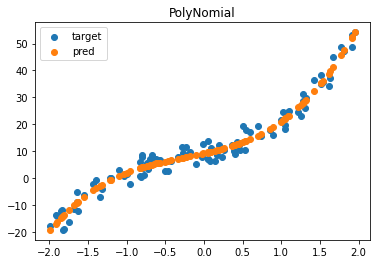

In [ ]:
plt.figure()
plt.scatter(X, y_noise, label='target')
plt.scatter(X, reg.predict(new_feature_three), label='pred')

plt.legend()
plt.title('PolyNomial')
plt.show()

$ {y = 3x^3 + 2x^2 + 7x + 1} $

$ {y = 3.20x^3 + 2.33x^2 + 6.35x + 9.18} $

# Practice 2

### 앞서 했던 sin 함수를 1차 그래프가 아닌 다차원 그래프로 정확한 예측을 해보자

In [ ]:
# N = 100

# X = np.linspace(0, 2*np.pi, N).reshape(N, 1)  # reshape(-1, 1)
# y = 3.20*X**3 + 2.33*X**2 + 6.35*X + 9.18

In [ ]:
N = 100

X = np.linspace(0, 2*np.pi, N).reshape(N, 1)   # 0부터 2파이 사이를 N개로 나눈 값 X를 생성

y = np.sin(X)  # y에 sin함수 저장

y += 0.3*np.random.rand(N, 1)  # 노이즈 만들어주기

In [ ]:
polynomial = PolynomialFeatures(degree = 3, include_bias = False)
sin_new_feature = polynomial.fit_transform(X)

In [ ]:
print("기존의 x[0]:",X[1])  # 위에서는 0번째 값을 출력한 것이고, 여기에서는 1번째 값을 출력한 것이다. (의미 없음)
print("Feature가 추가된 x[0]:", sin_new_feature[1])

기존의 x[0]: [0.06346652]
Feature가 추가된 x[0]: [0.06346652 0.004028   0.00025564]


In [ ]:
sin_new_feature

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.34665183e-02, 4.02799894e-03, 2.55643068e-04],
       [1.26933037e-01, 1.61119958e-02, 2.04514455e-03],
       [1.90399555e-01, 3.62519905e-02, 6.90236284e-03],
       [2.53866073e-01, 6.44479830e-02, 1.63611564e-02],
       [3.17332591e-01, 1.00699973e-01, 3.19553835e-02],
       [3.80799110e-01, 1.45007962e-01, 5.52189027e-02],
       [4.44265628e-01, 1.97371948e-01, 8.76855724e-02],
       [5.07732146e-01, 2.57791932e-01, 1.30889251e-01],
       [5.71198664e-01, 3.26267914e-01, 1.86363797e-01],
       [6.34665183e-01, 4.02799894e-01, 2.55643068e-01],
       [6.98131701e-01, 4.87387872e-01, 3.40260924e-01],
       [7.61598219e-01, 5.80031847e-01, 4.41751222e-01],
       [8.25064737e-01, 6.80731821e-01, 5.61647821e-01],
       [8.88531256e-01, 7.89487792e-01, 7.01484579e-01],
       [9.51997774e-01, 9.06299761e-01, 8.62795355e-01],
       [1.01546429e+00, 1.03116773e+00, 1.04711401e+00],
       [1.07893081e+00, 1.16409

### Shuffle & Split train, test

In [ ]:
# shuffle data
idx = np.random.permutation(N)  # N개의 array를 shuffle

shuffle_X = sin_new_feature[idx]
shuffle_y = y[idx]

print(shuffle_X[:3])
print(shuffle_y[:3])

[[ 1.26933037  1.61119958  2.04514455]
 [ 4.31572324 18.6254671  80.38236122]
 [ 2.66559377  7.10539013 18.94008364]]
[[ 1.03214487]
 [-0.66475959]
 [ 0.69620849]]


In [ ]:
n = int(N * (3/4))

# train data
X_train = shuffle_X[:n]
y_train = shuffle_y[:n]

# test data
X_test = shuffle_X[n:]
y_test = shuffle_y[n:]

### Perform Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print('w0: ', reg.intercept_)
print('w1: ', reg.coef_)

w0:  [0.00949947]
w1:  [[ 1.82749375 -0.85010446  0.09020229]]


### Plotting

In [ ]:
Pred = reg.predict(X_train)

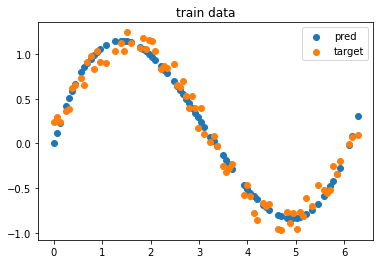

In [ ]:
plt.figure()
plt.scatter(X_train[:,0], Pred, label='pred')
plt.scatter(X_train[:,0], y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

### Test data 로 plot

In [ ]:
test_Pred = reg.predict(X_test)

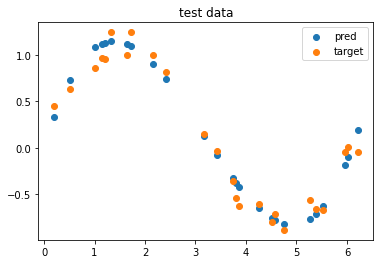

In [ ]:
plt.figure()
plt.scatter(X_test[:,0], test_Pred, label='pred')
plt.scatter(X_test[:,0], y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

### Train, Test data 로 plot

In [ ]:
X_all = shuffle_X[:]
y_all = shuffle_y[:]

all_Pred = reg.predict(X_all)

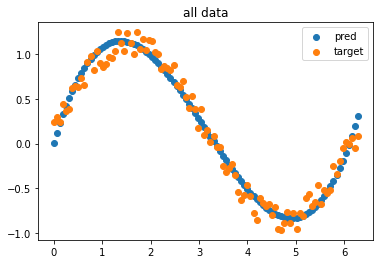

In [ ]:
plt.figure()
plt.scatter(X_all[:,0], all_Pred, label='pred')
plt.scatter(X_all[:,0], y_all, label='target')
plt.legend()
plt.title('all data')
plt.show()